roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
roll up
총 이동 거리는 : ? , 좌표는 : ? 


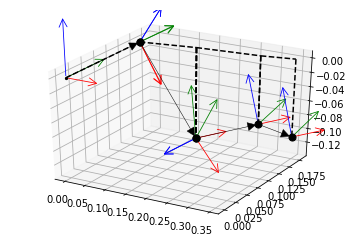

In [8]:
import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
import math
from matplotlib import pyplot as plt
import time
import numpy as np
import naoqi as n
import pepper_kinematics as pk
import tkinter as tk
import math
import numpy as np
import drawRobotics as dR
import Euler_Angles

# pyplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

right_arm_work_pose = [0.8, -0.2, 1.57-0.2, 0.9, -1.57]

current_angles = []
target_angles = [0.8, -0.2, 1.57-0.2, 0.9, -1.57]

for i in range(len(pk.left_arm_tags)): # ALMotion.getanlges arg - str 로 변환
    current_angles.append(right_arm_work_pose[i])
    
current_position, current_orientation = pk.left_arm_get_position(current_angles)

target_position = current_position
target_orientation = current_orientation # This is not supported yet

target_ori_euler = np.array(Euler_Angles.rot2euler(current_orientation))

root = tk.Tk()
root.title("motion GUI")
root.minsize(width=300, height= 300)

global font
tk.Label(root, text = "Choose Mode.").pack(side="top")

def update(angles):
    global fig
    global ax
    ax.remove()
    
    plt.draw()
    
    ax = fig.add_subplot(111, projection='3d')
    T1, T2, T3, T4, T5, T6 = pk.left_arm_get_trans(angles)
    
    
    dR.drawPointWithAxis(ax, Torso)
    dR.drawVector(ax, Torso, T1, arrowstyle='-|>')
    dR.drawPointWithAxis(ax, T1)
    dR.drawVector(ax, T1, T2, arrowstyle='-|>')
    dR.drawPointWithAxis(ax, T2)
    dR.drawVector(ax, T2, T3, arrowstyle='-|>')
    dR.drawPointWithAxis(ax, T3)
    dR.drawVector(ax, T3, T4, arrowstyle='-|>')
    dR.drawPointWithAxis(ax, T4)
    dR.drawVector(ax, T4, T5, arrowstyle='-|>')
    dR.drawPointWithAxis(ax, T5)
    dR.drawVector(ax, T5, T6, arrowstyle='-|>')
    dR.drawPointWithAxis(ax, T6)
    
def left(event):
    print("move left : 1cm")
    target_position[1] = target_position[1] + 0.01 # 1 cm move left
    global target_angles
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)
    update(target_angles)
    
def right(event):
    print("move right : 1cm")
    target_position[1] = target_position[1] - 0.01 # 1 cm move right
    global target_angles 
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)
    update(target_angles)
    
def foward(event):
    print("move foward : 1cm")
    target_position[0] = target_position[0] + 0.01 # 1 cm move foward
    global target_angles
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)
    update(target_angles)
    
    
def backward(event):
    print("move backward : 1cm")
    target_position[0] = target_position[0] - 0.01 # 1 cm move backward
    global target_angles
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)
    update(target_angles)
    
def up(event):
    print("move up : 1cm")
    target_position[2] = target_position[2] + 0.01 # 1 cm move up
    global target_angles
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)
    update(target_angles)

def down(event):
    print("move down : 1cm")
    target_position[2] = target_position[2] - 0.01 # 1 cm move down
    global target_angles
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)
    update(target_angles)
    
def roll_p(event):
    print("roll up")
    target_ori_euler[0] = target_ori_euler[0] + 0.01
    global target_angles
    target_angles = pk.left_arm_set_orientation(current_angles, target_position, target_ori_euler)
    update(target_angles)

def pitch_p(event):
    print("pitch up")
    target_ori_euler[1] = target_ori_euler[1] + 0.01
    global target_angles
    target_angles = pk.left_arm_set_orientation(current_angles, target_position, target_ori_euler)
    update(target_angles)
    
def yaw_p(event):
    print("yaw up")
    target_ori_euler[2] = target_ori_euler[2] + 0.01
    global target_angles
    target_angles = pk.left_arm_set_orientation(current_angles, target_position, target_ori_euler)
    update(target_angles)

def roll_m(event):
    print("roll_down")
    target_ori_euler[0] = target_ori_euler[0] - 0.01
    global target_angles
    target_angles = pk.left_arm_set_orientation(current_angles, target_position, target_ori_euler)
    update(target_angles)
    
def yaw_m(event):
    print("pitch down")
    target_ori_euler[1] = target_ori_euler[1] - 0.01
    global target_angles
    target_angles = pk.left_arm_set_orientation(current_angles, target_position, target_ori_euler)
    update(target_angles)
    
def yaw_p(event):
    print("yaw down")
    target_ori_euler[2] = target_ori_euler[2] - 0.01
    global target_angles
    target_angles = pk.left_arm_set_orientation(current_angles, target_position, target_ori_euler)
    update(target_angles)


def quit(event):
    print("총 이동 거리는 : ? , 좌표는 : ? ")
    global root
    root.destroy()
    
def callback():
    frame1.focus_set() # 키보드에 focus
    frame1.bind("<Left>", left)
    frame1.bind("<Right>", right)
    frame1.bind("<Up>", foward)
    frame1.bind("<Down>", backward)
    frame1.bind("<Shift-Up>", up)
    frame1.bind("<Shift-Down>", down)
    frame1.bind("<Escape>", quit)
    frame1.bind("<q>",roll_p)
    frame1.bind("<w>",pitch_p)
    frame1.bind("<a>",yaw_p)
    
def callback2():
    lbl = tk.Label(frame2, text = "Coordinate")
    lbl.pack()
    
    xlbl = tk.Label(frame2, text = "X" )
    xlbl.pack()
    global x
    x = tk.Entry(frame2, width = 10)
    x.pack()
    x.focus_set() # 포커스 설정
    
    
    ylbl = tk.Label(frame2, text = "Y")
    ylbl.pack()
    global y
    y = tk.Entry(frame2, width = 10)
    y.pack()
    
    zlbl = tk.Label(frame2, text = "Z")
    zlbl.pack()
    global z
    z = tk.Entry(frame2, width = 10)
    z.pack()  
  
    btnmove = tk.Button(frame2, text="Move", command = movecoordinate)
    btnmove.pack(side = "bottom")

    btnsave = tk.Button(frame2, text="Save", command = saveVar)
    btnsave.pack(side = "bottom")
    


def saveVar():
    global move_position_x, move_position_y, move_position_z 
    move_position_x= float(x.get())
    move_position_y= float(y.get())
    move_position_z= float(z.get())
    
    print("Save arg x",move_position_x," y",move_position_y," z",move_position_z)
    
def movecoordinate():
    
    target_position[0] = move_position_x
    target_position[1] = move_position_y
    target_position[2] = move_position_z
    
    global target_angles
    target_angles = pk.left_arm_set_position(current_angles, target_position, target_orientation)


Torso = np.array([[1, 0, 0, 0], 
                  [0, 1, 0, 0],
                  [0, 0, 1, 0], 
                  [0, 0, 0, 1]])



T1, T2, T3, T4, T5, T6 = pk.left_arm_get_trans(current_angles)

dR.drawPointWithAxis(ax, Torso)
dR.drawVector(ax, Torso, T1, arrowstyle='-|>')
dR.drawPointWithAxis(ax, T1)
dR.drawVector(ax, T1, T2, arrowstyle='-|>')
dR.drawPointWithAxis(ax, T2)
dR.drawVector(ax, T2, T3, arrowstyle='-|>')
dR.drawPointWithAxis(ax, T3)
dR.drawVector(ax, T3, T4, arrowstyle='-|>')
dR.drawPointWithAxis(ax, T4)
dR.drawVector(ax, T4, T5, arrowstyle='-|>')
dR.drawPointWithAxis(ax, T5)
dR.drawVector(ax, T5, T6, arrowstyle='-|>')
dR.drawPointWithAxis(ax, T6)

ax.set_xlim([-0.01,0.4]), ax.set_ylim([-0,0.2]), ax.set_zlim([-0.2,0])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')

plt.ion()
    
frame1 = tk.Frame(root, width=300, height=300)
frame1.pack(side="top", expand = "true", anchor = "n")

frame2 = tk.Frame(root, width=300, height=300)
frame2.pack(side="bottom", expand = "true" , anchor ="n")

btn=tk.Button(frame1, text="control", command = callback)
btn.pack(side ="top")

btn2=tk.Button(frame2, text="place", command = callback2)
btn2.pack(side ="top")

root.mainloop()
